In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Missing value analysis and treatment:-
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill the Age with Mean and Embarked with Mode:-
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
# Apart from NaN there are cabin in multiples
# Extract the first chararcter of cabin
# Extract the number of cabin of each row

df["Cabin_Count"] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
df["Cabin_Letter"] = df.Cabin.apply(lambda x: str(x)[0])

In [13]:
len("E77".split(" "))

1

In [14]:
df[["Cabin","Cabin_Count","Cabin_Letter"]].head()

,Cabin,Cabin_Count,Cabin_Letter
0,NaN,0,n
1,C85,1,C
2,NaN,0,n
3,C123,1,C
4,NaN,0,n


In [15]:
# Drop Cabin and PassengerID:-
df = df.drop(columns = ["PassengerId","Cabin"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Count,Cabin_Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,n
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,n
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,n


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Embarked      891 non-null    object 
 10  Cabin_Count   891 non-null    int64  
 11  Cabin_Letter  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Cabin_Count     0
Cabin_Letter    0
dtype: int64

In [18]:
# Extract title from Name:-
# Create a column Ticket_Num filling 0 fror non-numeric tickets and 1 for numeric:-
# Create a column ticket_Letter with the extracting alnm part of ticket:-
df["Title"] = df.Name.apply(lambda x: x.split(",")[1].split(",")[0].strip())

In [19]:
df["Ticket_Num"] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df["Ticket_Letter"] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1])>0 else 0)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Count,Cabin_Letter,Title,Ticket_Num,Ticket_Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,n,Mr. Owen Harris,0,a5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,Mrs. John Bradley (Florence Briggs Thayer),0,pc
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,n,Miss. Laina,0,stono2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,Mrs. Jacques Heath (Lily May Peel),1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,n,Mr. William Henry,1,0


In [21]:
df = df.drop(columns = ["Name","Ticket"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Cabin_Count    891 non-null    int64  
 9   Cabin_Letter   891 non-null    object 
 10  Title          891 non-null    object 
 11  Ticket_Num     891 non-null    int64  
 12  Ticket_Letter  891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [23]:
for col in df.columns:
    print(df[col].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Cabin_Count
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64
Cabin_Letter
n    687
C     59
B     47
D     33
E     32
A     15


In [24]:
dumies = pd.get_dummies(df,dtype = "int")
dumies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_Count,Ticket_Num,Sex_female,Sex_male,...,Ticket_Letter_soc,Ticket_Letter_sop,Ticket_Letter_sopp,Ticket_Letter_sotono2,Ticket_Letter_sotonoq,Ticket_Letter_sp,Ticket_Letter_stono2,Ticket_Letter_swpp,Ticket_Letter_wc,Ticket_Letter_wep
0,0,3,22.0,1,0,7.2500,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Data Scaling:-
1. MinMax Scaler - Ensures that range of the data is between 0 and 1
2. Standard Scaler - Standardize the data such that the mean is 0 and std is 1


<Axes: ylabel='Density'>

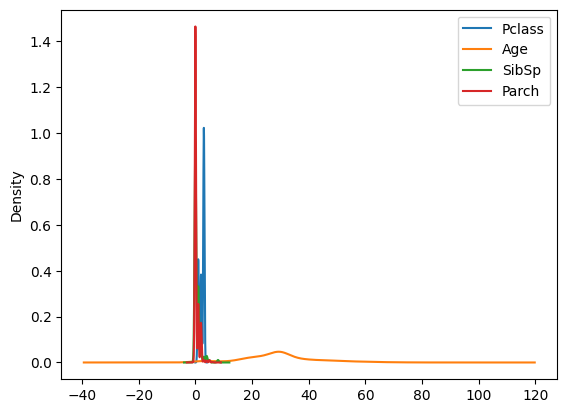

In [25]:
dumies.iloc[:,1:5].plot.kde()

Train-Test Split:-

In [26]:
x = dumies.drop(columns = ["Survived"])
y = dumies["Survived"]

In [27]:
x

,Pclass,Age,SibSp,Parch,Fare,Cabin_Count,Ticket_Num,Sex_female,Sex_male,Embarked_C,...,Ticket_Letter_soc,Ticket_Letter_sop,Ticket_Letter_sopp,Ticket_Letter_sotono2,Ticket_Letter_sotonoq,Ticket_Letter_sp,Ticket_Letter_stono2,Ticket_Letter_swpp,Ticket_Letter_wc,Ticket_Letter_wep
0,3,22.000000,1,0,7.2500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,35.000000,1,0,53.1000,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,35.000000,0,0,8.0500,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
887,1,19.000000,0,0,30.0000,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
888,3,29.699118,1,2,23.4500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
889,1,26.000000,0,0,30.0000,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
# Sklearn Function:-
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
ss = StandardScaler()

In [30]:
df_transform = mm.fit_transform(x)
mm_df = pd.DataFrame(df_transform, columns = x.columns)

<Axes: ylabel='Density'>

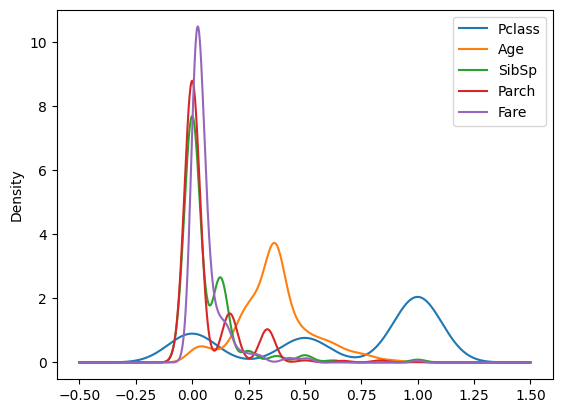

In [31]:
mm_df.iloc[:,:5].plot.kde()

In [32]:
df_transform_ss = ss.fit_transform(x)
ss_df = pd.DataFrame(df_transform_ss, columns = x.columns)

<Axes: ylabel='Density'>

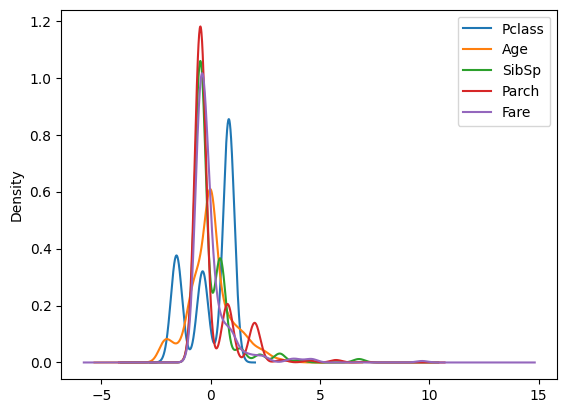

In [33]:
ss_df.iloc[:,:5].plot.kde()

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
x,y = make_classification(n_samples = 9000,n_features = 18,n_informative = 4,n_redundant = 12,random_state = 25)

In [36]:
x.shape

(9000, 18)

In [37]:
y.shape

(9000,)

In [38]:
x[:2,:2]

array([[-1.44355128, -1.74224383],
       [ 0.31973094,  1.15483673]])

In [39]:
y[:5]

array([0, 1, 1, 0, 0])

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 25)

In [41]:
train_score = []
test_score =[]
values = [i for i in range(1,21)]
print(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [42]:
for i in values:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_train,train_pred)
    test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test,test_pred)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print(f"For Depth {i}, Training Accuracy = {train_acc}, Testing Accuracy = {test_acc}") 

For Depth 1, Training Accuracy = 0.6876190476190476, Testing Accuracy = 0.6966666666666667
For Depth 2, Training Accuracy = 0.7877777777777778, Testing Accuracy = 0.7914814814814815
For Depth 3, Training Accuracy = 0.8158730158730159, Testing Accuracy = 0.8118518518518518
For Depth 4, Training Accuracy = 0.8328571428571429, Testing Accuracy = 0.8318518518518518
For Depth 5, Training Accuracy = 0.8747619047619047, Testing Accuracy = 0.8677777777777778
For Depth 6, Training Accuracy = 0.9168253968253969, Testing Accuracy = 0.9085185185185185
For Depth 7, Training Accuracy = 0.9326984126984127, Testing Accuracy = 0.9174074074074074
For Depth 8, Training Accuracy = 0.946984126984127, Testing Accuracy = 0.9192592592592592
For Depth 9, Training Accuracy = 0.9604761904761905, Testing Accuracy = 0.9266666666666666
For Depth 10, Training Accuracy = 0.9682539682539683, Testing Accuracy = 0.9322222222222222
For Depth 11, Training Accuracy = 0.9766666666666667, Testing Accuracy = 0.931481481481481

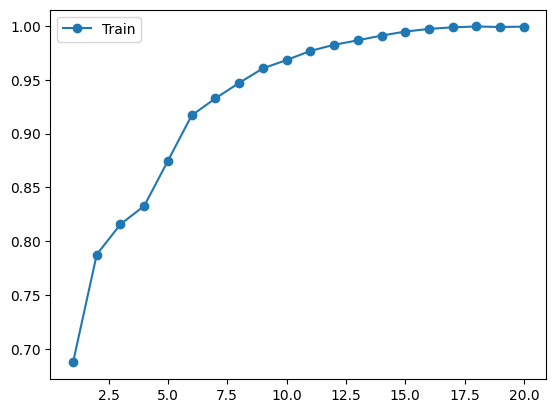

In [43]:
plt.plot(values, train_score, "-o", label = "Train")
plt.legend()
plt.show()

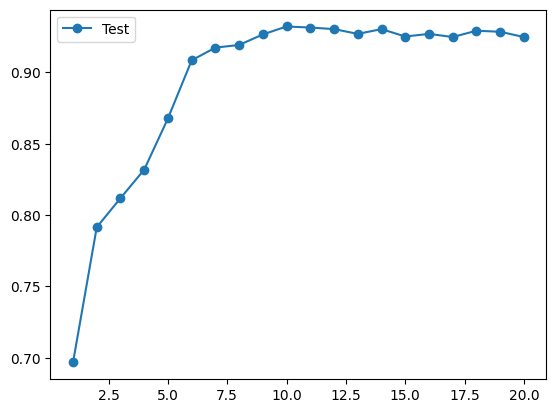

In [44]:
plt.plot(values, test_score, "-o", label = "Test")
plt.legend()
plt.show()

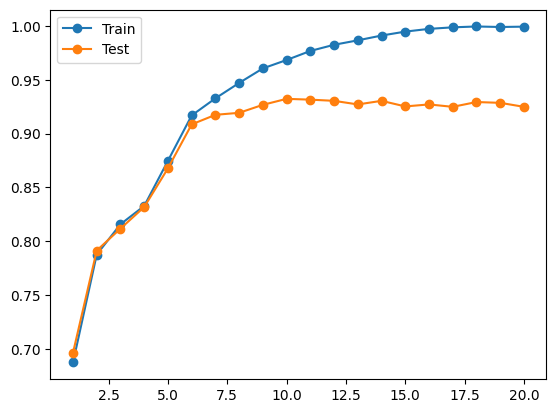

In [45]:
plt.plot(values, train_score, "-o", label = "Train")
plt.plot(values, test_score, "-o", label = "Test")
plt.legend()
plt.show()

In [46]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [47]:
text_tree = export_text(model)
print(text_tree)

|--- feature_6 <= 0.19
|   |--- feature_12 <= 0.26
|   |   |--- feature_14 <= 2.84
|   |   |   |--- feature_12 <= -0.75
|   |   |   |   |--- feature_3 <= -0.07
|   |   |   |   |   |--- feature_3 <= -0.99
|   |   |   |   |   |   |--- feature_11 <= -0.51
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_11 >  -0.51
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -0.99
|   |   |   |   |   |   |--- feature_6 <= -1.36
|   |   |   |   |   |   |   |--- feature_9 <= -0.59
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -0.24
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_7 >  -0.24
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.02
|   |   |   |   |   |   |   |   |   |--- feature_9 <= -0.87
|   |   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.76
|   |   

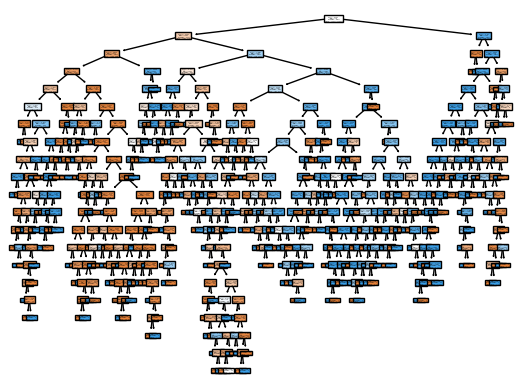

<Figure size 10000x10000 with 0 Axes>

In [48]:
plot_tree(model, filled = True)
plt.figure(figsize = (100,100))
plt.show()

In [49]:
from sklearn.tree import export_text

In [50]:
model1 = DecisionTreeClassifier(max_depth = 3)
model1.fit(x_train,y_train)
train_pred = model1.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)
test_pred = model1.predict(x_test)
test_acc = accuracy_score(y_test,test_pred)
train_score.append(train_acc)
test_score.append(test_acc)
print(f"For Depth 3, Training Accuracy = {train_acc}, Testing Accuracy = {test_acc}") 

For Depth 3, Training Accuracy = 0.8158730158730159, Testing Accuracy = 0.8114814814814815


In [51]:
text_tree = export_text(model1)
print(text_tree)

|--- feature_6 <= 0.19
|   |--- feature_12 <= 0.26
|   |   |--- feature_14 <= 2.84
|   |   |   |--- class: 0
|   |   |--- feature_14 >  2.84
|   |   |   |--- class: 1
|   |--- feature_12 >  0.26
|   |   |--- feature_0 <= -0.29
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.29
|   |   |   |--- class: 1
|--- feature_6 >  0.19
|   |--- feature_3 <= -1.97
|   |   |--- feature_14 <= -4.13
|   |   |   |--- class: 1
|   |   |--- feature_14 >  -4.13
|   |   |   |--- class: 0
|   |--- feature_3 >  -1.97
|   |   |--- feature_17 <= 1.03
|   |   |   |--- class: 1
|   |   |--- feature_17 >  1.03
|   |   |   |--- class: 0



In [52]:
from sklearn.tree import plot_tree

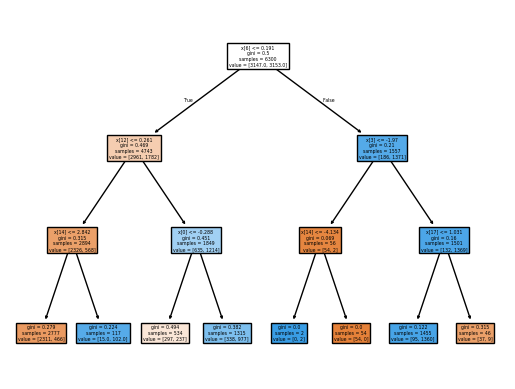

<Figure size 1500x1500 with 0 Axes>

In [53]:
plot_tree(model1, filled = True)
plt.figure(figsize = (15,15))
plt.show()